# Imblance Class 불균형 분류 - WINE QUALITY
#### 편집: 고우주 | kubwa 쿱와

## 0. Importing Packages

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. 데이터 불러오기

In [6]:
df = pd.read_csv('data/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
print(*df.columns, sep='\n')

type
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [9]:
df.columns = ('type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')

In [10]:
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2. 결측치 처리

In [261]:
import seaborn as sns

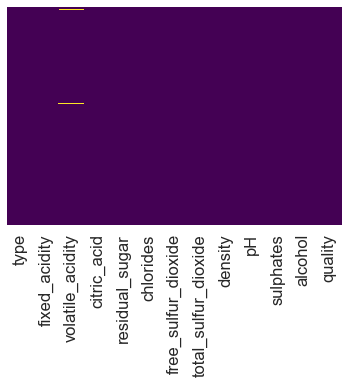

In [262]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [263]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed_acidity,10,0.001539
volatile_acidity,8,0.001231
citric_acid,3,0.000462
residual_sugar,2,0.000308
chlorides,2,0.000308
free_sulfur_dioxide,0,0.000000
total_sulfur_dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [264]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

## 3. EDA 탐색적 데이터 분석

In [265]:
fill_list = (null_cell(df)).index

In [266]:
df_mean = df.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

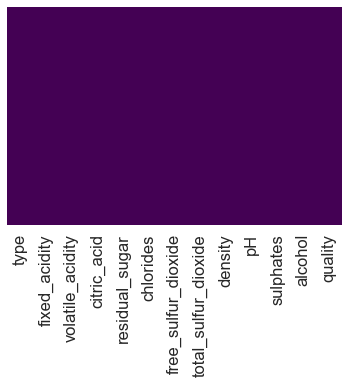

In [267]:
sns.heatmap(df_mean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [268]:
corr_matrix = df_mean.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]

In [269]:
corr_list

Index(['quality', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH'],
      dtype='object')

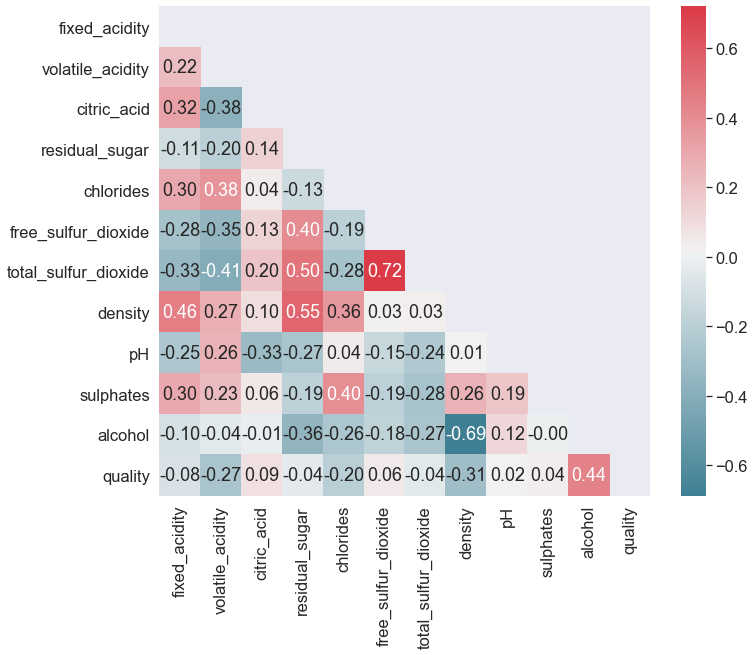

In [270]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

 #### Distribution  of Variables

In [271]:
from scipy.stats import norm 

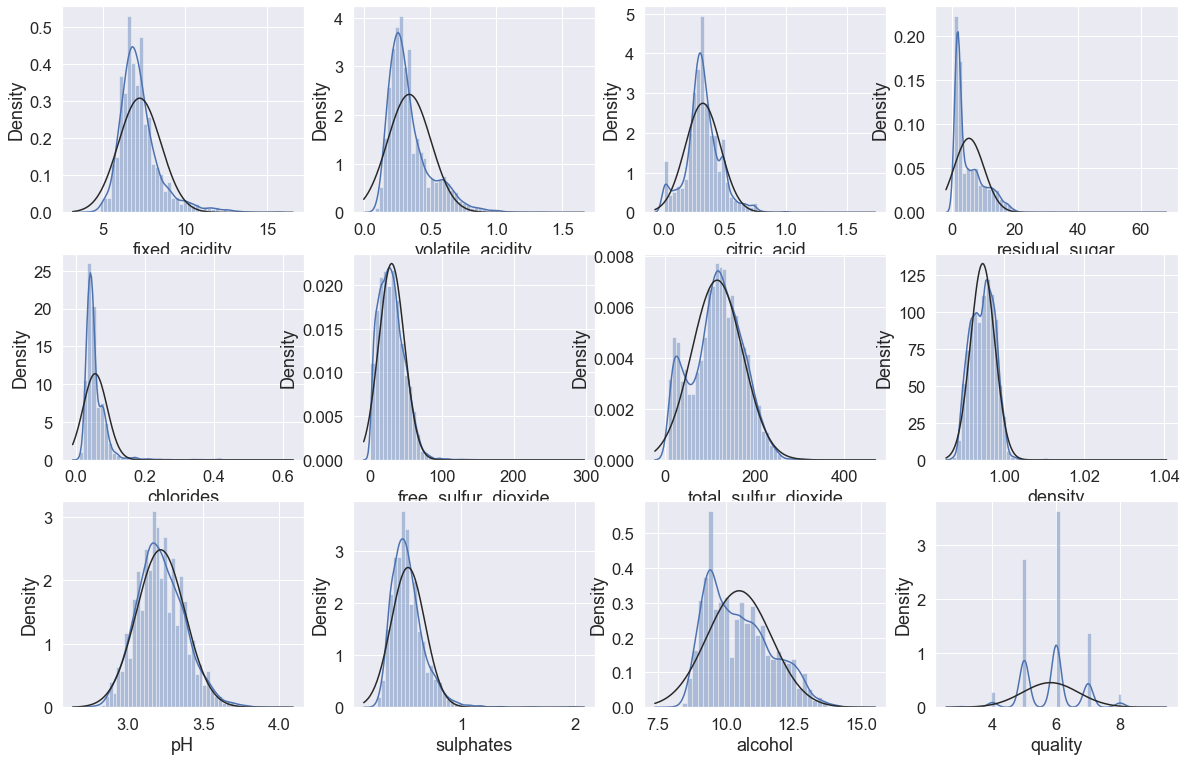

In [272]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)
    

# <div align="center"> **7. General Looking at Wine Quality Classes

## 4.EDA: Bins 사용 Wine Quality Classes

In [273]:
df_bins= df_mean.copy()

In [274]:
bins = [0,5,10]


labels = [0, 1] # 'low'=0, 'high'=1
df_bins['quality_range']= pd.cut(x=df_bins['quality'], bins=bins, labels=labels)

print(df_bins[['quality_range','quality']].head(5))

df_bins = df_bins.drop('quality', axis=1) 

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


### Quality in  Different Wine Types

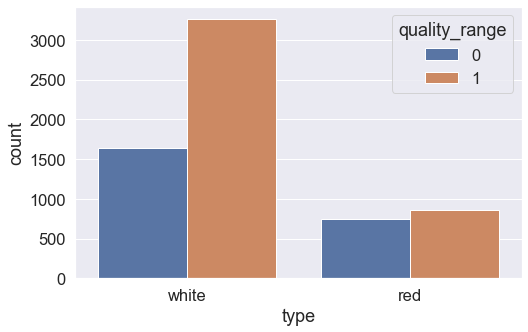

In [275]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'quality_range', data = df_bins)
plt.show()
# 'low'=0, 'high'=1

As we see on the chart, Low quality red wine has the highest numerical value in data set as well as low quality white wine. 
High quality white and red wines have little place in data. 

### Quality & Alcohol Relation 

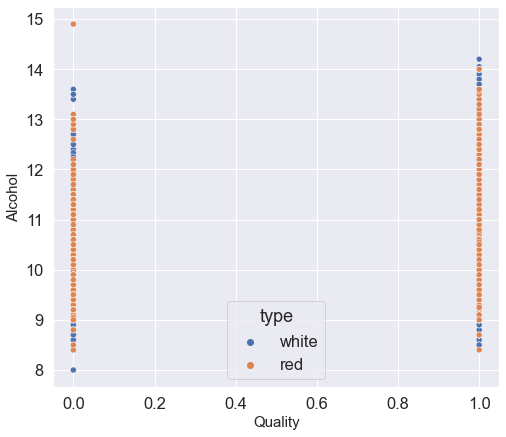

In [276]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='quality_range', 
                y='alcohol', 
                hue='type',
                data=df_bins);
plt.xlabel('Quality',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

### Quality & Volatile Acidity by Types

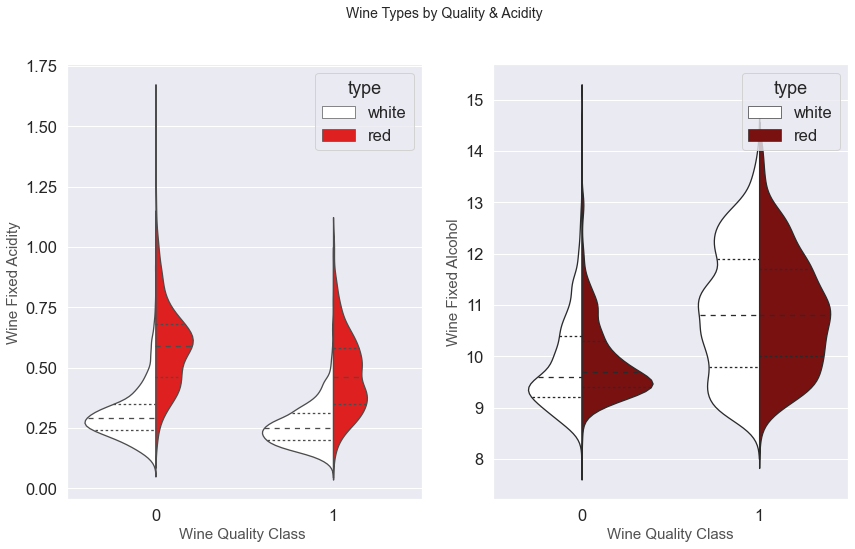

In [277]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
f.suptitle('Wine Types by Quality & Acidity', fontsize=14)

sns.violinplot(x='quality_range', y='volatile_acidity', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'red', 'white': 'white'}, ax=ax1)
ax1.set_xlabel("Wine Quality Class ",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 15,alpha=0.8)

sns.violinplot(x='quality_range', y='alcohol', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'darkred', 'white': 'white'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Fixed Alcohol",size = 15,alpha=0.8)
plt.show()

### Chlorides Level in Quality Classes 

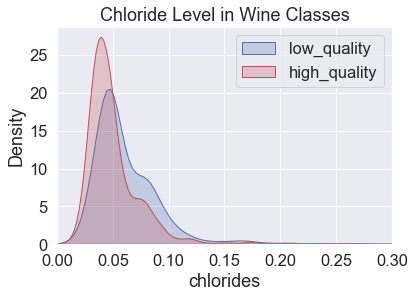

In [278]:
plt.figure(figsize= (6,4))

low_quality = df_bins [df_bins['quality_range']== 0]['chlorides']
high_quality   = df_bins [df_bins['quality_range']== 1][ 'chlorides']
ax = sns.kdeplot(data= low_quality, label= 'low_quality', shade=True, color=None)
ax = sns.kdeplot(data= high_quality,label= 'high_quality',shade=True, color= "r")

plt.title("Chloride Level in Wine Classes")
plt.xlim(0.0,0.3)
plt.legend()
plt.show()

### Fixed Acidity & Volatile Acidity & Citric Acid Density in Quality Classes

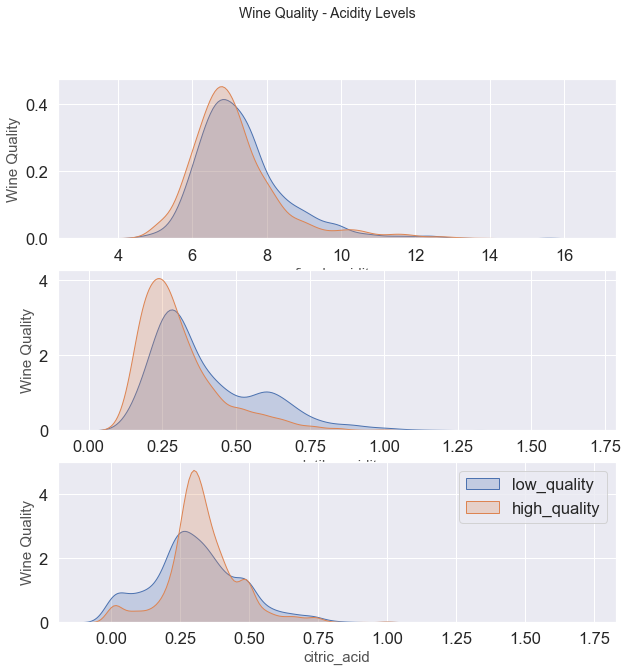

In [279]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))

f.suptitle('Wine Quality - Acidity Levels', fontsize=14)


fixed_acidity_low_quality    = df_bins [df_bins['quality_range']== 0]['fixed_acidity']
fixed_acidity_high_quality   = df_bins [df_bins['quality_range']== 1]['fixed_acidity']


volatile_acidity_low_quality = df_bins [df_bins['quality_range']== 0]['volatile_acidity']
volatile_acidity_high_quality= df_bins [df_bins['quality_range']== 1]['volatile_acidity']

citric_acid_low_quality      = df_bins [df_bins['quality_range']== 0]['citric_acid']
citric_acid_high_quality     = df_bins [df_bins['quality_range']== 1]['citric_acid']


sns.kdeplot(data=fixed_acidity_low_quality, label="low_quality", shade=True,ax=ax1)
sns.kdeplot(data=fixed_acidity_high_quality, label="high_quality", shade=True, ax=ax1)
ax1.set_xlabel("fixed_acidity",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=volatile_acidity_low_quality, label="low_quality", shade=True,ax=ax2)
sns.kdeplot(data=volatile_acidity_high_quality, label="high_quality", shade=True, ax=ax2)
ax2.set_xlabel("volatile_acidity",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=citric_acid_low_quality, label="low_quality", shade=True,ax=ax3)
sns.kdeplot(data=citric_acid_high_quality, label="high_quality", shade=True, ax=ax3)
ax3.set_xlabel("citric_acid",size = 15,alpha=0.8)
ax3.set_ylabel("Wine Quality",size = 15,alpha=0.8)


plt.legend()
plt.show()

### Residual Sugar Levels by Wine Quality Classes

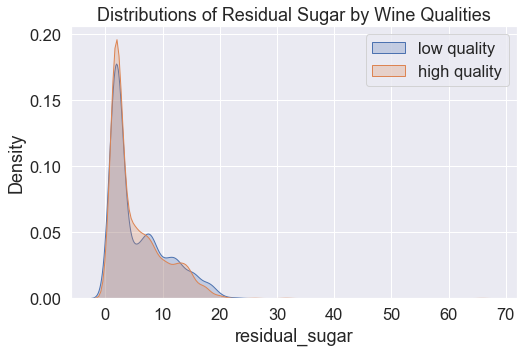

In [280]:
plt.figure(figsize=(8,5))

residual_sugar_low   = df_bins [df_bins['quality_range']== 0]['residual_sugar']
residual_sugar_high  = df_bins [df_bins['quality_range']== 1]['residual_sugar'] 
ax = sns.kdeplot(data= residual_sugar_low, label= 'low quality', shade=True)
ax = sns.kdeplot(data= residual_sugar_high,   label= 'high quality',   shade=True)

plt.title("Distributions of Residual Sugar by Wine Qualities")
plt.legend()
plt.show()

### Sulfur Dioxide Distribution in Wine Quality Classes

Text(0, 0.5, 'free_sulfur_dioxide')

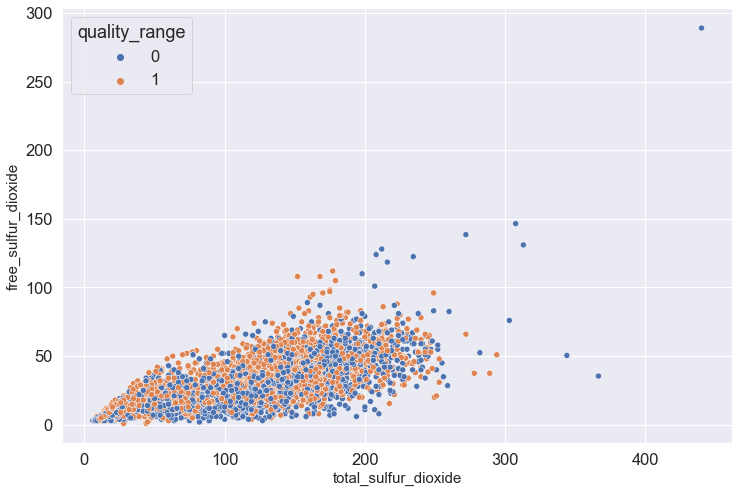

In [281]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_sulfur_dioxide', y='free_sulfur_dioxide', hue='quality_range',data=df_bins);
plt.xlabel('total_sulfur_dioxide',size=15)
plt.ylabel('free_sulfur_dioxide', size =15)

### pH Level in Wine Quality

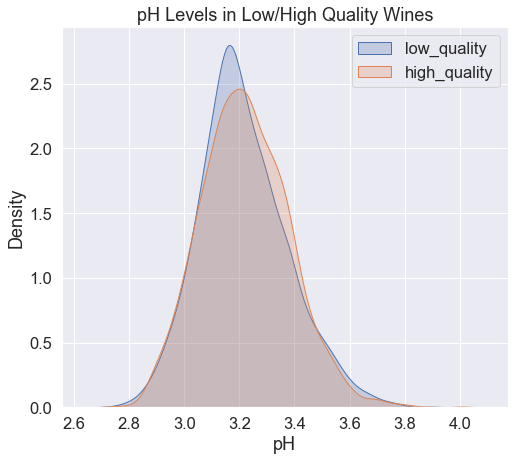

In [282]:
plt.figure(figsize=(8,7))

pH_low_quality  = df_bins [df_bins['quality_range']== 0]['pH']
pH_high_quality = df_bins [df_bins['quality_range']== 1][ 'pH']
ax = sns.kdeplot(data= pH_low_quality, label= 'low_quality', shade=True) 
ax = sns.kdeplot(data= pH_high_quality,label= 'high_quality',   shade=True)

plt.title("pH Levels in Low/High Quality Wines")
plt.xlabel('pH')
plt.legend()
plt.show()

### Density by Wine Quality Classes

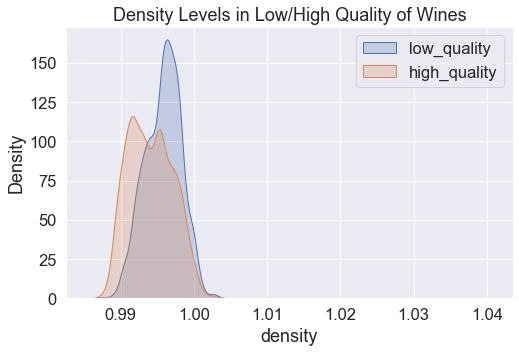

In [283]:
plt.figure(figsize=(8,5))

density_low_quality  = df_bins [df_bins['quality_range']== 0]['density']
density_high_quality = df_bins [df_bins['quality_range']== 1][ 'density']
ax = sns.kdeplot(data= density_low_quality, label= 'low_quality', shade=True) 
ax = sns.kdeplot(data= density_high_quality,label= 'high_quality', shade=True)

plt.title("Density Levels in Low/High Quality of Wines")
plt.xlabel('density')
plt.legend()
plt.show()

### Sulphate Values in Wine Quality Classes

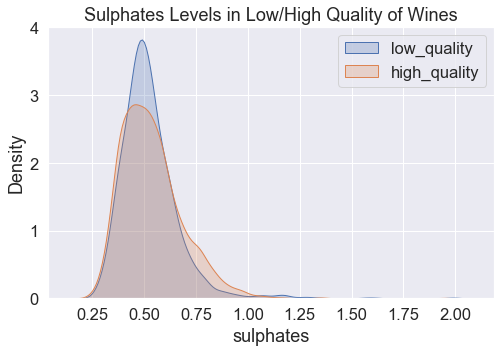

In [284]:
plt.figure(figsize=(8,5))

sulphates_low_quality    = df_mean [df_bins['quality_range']== 0]['sulphates']
sulphates_high_quality   = df_mean [df_bins['quality_range']== 1][ 'sulphates']
ax = sns.kdeplot(data= sulphates_low_quality, label= 'low_quality',  shade=True) 
ax = sns.kdeplot(data= sulphates_high_quality,label= 'high_quality', shade=True)

plt.title("Sulphates Levels in Low/High Quality of Wines")
plt.xlabel('sulphates')
plt.legend()
plt.show()

There is more low quality wine in between 0.4 and 0.6 levels of sulphate levels. Both quality classes have similar values.

## 5. 극단치 Outlier 처리

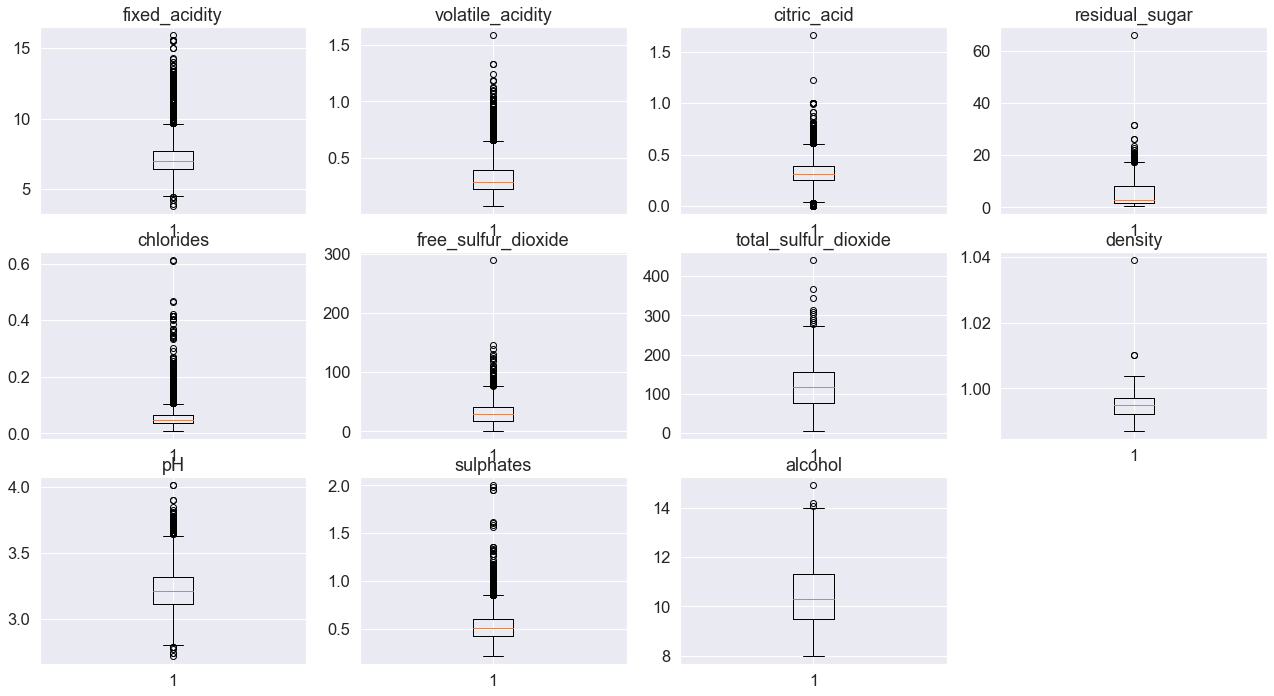

In [285]:
outliers_by_12_variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
                            'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
plt.figure(figsize=(22,20))

for i in range(0,11):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_bins[outliers_by_12_variables[i]])
    plt.title(outliers_by_12_variables[i])

In [286]:
def winsor(x, multiplier=3): 
    upper= x.median() + x.std()*multiplier
    for limit in np.arange(0.001, 0.20, 0.001):
        if np.max(winsorize(x,(0,limit))) < upper:
            return limit
    return None 

In [287]:
from scipy.stats.mstats import winsorize

kolon_isimleri = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                                  'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i in range(1,len(kolon_isimleri)):

    df_bins[kolon_isimleri[i]] = winsorize(df_bins[kolon_isimleri[i]], (0, winsor(df_bins[kolon_isimleri[i]])))

---

# 6. 학습 모델링

## 6-1 Creating Train / Test Groups with 2 Bins Model 

In [288]:
df_bins['type'] = df_bins['type'].map({'white':0, 'red':1})

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [290]:
X = df_bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']] 
y = df_bins.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

### LogisticRegression

In [291]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [292]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.73
Accuracy in Test  Group   : 0.72


### Confusion Matrix in Chart

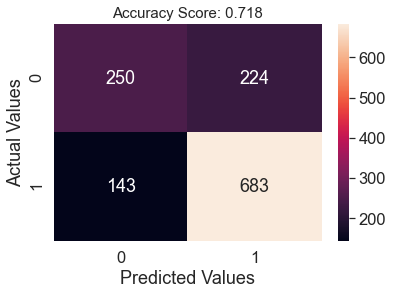

In [293]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [294]:
pred_test  = lr.predict(X_test)
pred_train = lr.predict(X_train)

### Confusion Matrix in array format

In [295]:
from sklearn.metrics import confusion_matrix 


cm = confusion_matrix(y_test,pred_test)
cm

array([[250, 224],
       [143, 683]])

### Performance Metrics

In [296]:
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(random_state=40)

In [297]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')
print('Confusion Matrix Test Data', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[1049  861]
 [ 550 2737]]
Confusion Matrix Test Data
----------------------------------------
[[250 224]
 [143 683]]


In [298]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 250
(Total) True Positive       : 683
(Total) Negative Positive   : 224
(Total) Negative Negative   : 143


In [299]:
FP+FN 

367

#### Accuracy

In [300]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Our Model     : ",  quality_pred.score(X_test, y_test))
#print("Accuracy Score of Our Model     : ",  accuracy_score(y_test, pred_test)) # same 

Accuracy Score of Our Model     :  0.7176923076923077


#### Precision: TP / (TP + FP)


In [301]:
from sklearn.metrics import precision_score

print("precision_score()         : ",  precision_score(y_test, pred_test, average='micro'))

precision_score()         :  0.7176923076923077


#### Recall TP / (TP + FN)

In [302]:
from sklearn.metrics import recall_score

print("recall_score()            : ",  recall_score(y_test, pred_test, average='micro'))

recall_score()            :  0.7176923076923077


#### F1-Score: (2 * Recall * Precision) / (Recall + Precision) )

In [303]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')
recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))
#print("F1_score     : ",  f1_score(y_test, pred_test,average='micro')) #By formula

F1_score     :  0.7176923076923077


In [304]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test))

print("f1_score        : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))
print("recall_score    : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))
print("precision_score : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')
metrics =  precision_recall_fscore_support(y_test, pred_test)
print("Precision       :" , metrics[0]) 
#print("Recall          :" , metrics[1]) 
print("F1 Score        :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       474
           1       0.75      0.83      0.79       826

    accuracy                           0.72      1300
   macro avg       0.69      0.68      0.68      1300
weighted avg       0.71      0.72      0.71      1300

f1_score        : 0.72
recall_score    : 0.72
precision_score : 0.72


Precision       : [0.63613232 0.75303197]
F1 Score        : [0.57670127 0.78822851]


#### ROC/AUC(Area Under Curve

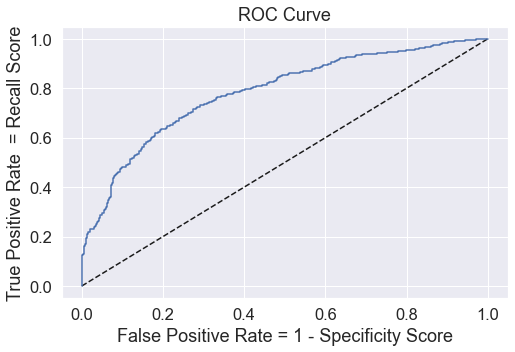

In [305]:
probs = quality_pred.predict_proba(X_test)[:,1]  #Predict probabilities for the test data

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs) #Get the ROC Curve

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [306]:
print('AUC_Score : ', roc_auc_score(y_test.values, probs))

AUC_Score :  0.7835177409303135


#### Log Loss

In [307]:
from sklearn.metrics import log_loss

print("Log-Loss)    : " , log_loss(y_test.values, probs))
print("Error Rate   : " , 1- accuracy_score(y_test.values, pred_test))

Log-Loss)    :  0.5321875914369443
Error Rate   :  0.28230769230769226


### C hyperparmater

In [308]:
C_values = [0.001,0.01,0.1,1,10,100, 1000]
accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

,C Value,Accuracy Train,Accuracy Test
0,0.001,0.687704,0.668462
1,0.010,0.711949,0.696923
2,0.100,0.727535,0.720000
3,1.000,0.728497,0.717692
4,10.000,0.733693,0.730000
5,100.000,0.729459,0.723846
6,1000.000,0.728882,0.721538


## 6-2 Creating 3 Bins Models (large Margin)

In [309]:
df_mean.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [310]:
df_bins3= df_mean.copy()

In [311]:
df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

In [312]:
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0,'average'=1, 'high'=2

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins, labels=labels)

#df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

print(df_bins3[['quality_range','quality']].head(5))


  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


In [313]:
X = df_bins3[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']]
y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)


In [314]:
X_train.head()

,type,alcohol,density,volatile_acidity,chlorides,citric_acid,fixed_acidity,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,pH
908,0,9.8,0.99795,0.23,0.054,0.37,8.0,23.0,159.0,0.47,9.6,3.32
3131,0,8.8,0.99918,0.35,0.061,0.26,6.3,59.0,198.0,0.49,17.6,3.11
2585,0,9.0,0.99808,0.18,0.062,0.30,6.8,19.0,171.0,0.52,12.8,3.00
3375,0,10.2,0.99700,0.22,0.047,0.26,7.8,38.0,132.0,0.53,9.0,3.25
4444,0,11.3,0.99241,0.35,0.031,0.25,5.0,24.0,116.0,0.40,7.8,3.39


### LogisticRegression

In [315]:
lr    = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [316]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy Score of Train Model : 0.93
Accuracy Score of Test  Model : 0.93


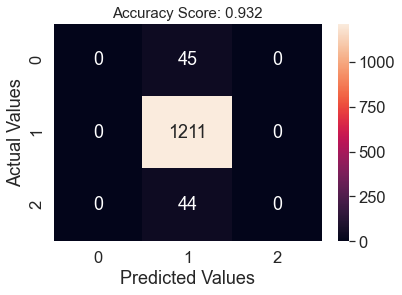

In [317]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [318]:
y_pred = lr.predict(X_test)
y_pred[y_pred == 2]

array([], dtype=int64)

In [319]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[   0,   45,    0],
       [   0, 1211,    0],
       [   0,   44,    0]])

### Performance Metrics

In [320]:
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(random_state=40)

In [321]:
pred_train = lr.predict(X_train)
pred_test  = lr.predict(X_test)

In [322]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')
print('Confusion Matrix Test  Data ', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[   0  201    0]
 [   0 4842    0]
 [   0  154    0]]
Confusion Matrix Test  Data 
----------------------------------------
[[   0   45    0]
 [   0 1211    0]
 [   0   44    0]]


In [323]:
#TN = confusion_matrix_test[0][0]
#TP = confusion_matrix_test[1][1]
#FP = confusion_matrix_test[0][1]
#FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 250
(Total) True Positive       : 683
(Total) Negative Positive   : 224
(Total) Negative Negative   : 143


#### Accuracy

In [324]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Test Model : ",  quality_pred.score(X_test, y_test))

Accuracy Score of Test Model :  0.9315384615384615


#### Precision

In [325]:
from sklearn.metrics import precision_score

print("precision_score        : ",  precision_score(y_test, pred_test, average='micro'))

precision_score        :  0.9315384615384615


### Recall/Sensitivity

In [326]:
from sklearn.metrics import recall_score

print("recall_score        : ",  recall_score(y_test, pred_test, average='micro'))

recall_score        :  0.9315384615384615


#### F1 Score

In [327]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')
recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))# by mathematical formula
print("f1_score()   : ",  f1_score(y_test, pred_test,average='micro'))  #By formula

F1_score     :  0.9315384615384615
f1_score()   :  0.9315384615384615


In [328]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test) )

print("f1_score()         : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))
print("recall_score()     : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))
print("precision_score()  : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')
metrikler =  precision_recall_fscore_support(y_test, pred_test)
print("Precision   :" , metrics[0]) 
print("Recall      :" , metrics[1]) 
print("F1 Score    :" , metrics[2]) 

warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.93      1.00      0.96      1211
           2       0.00      0.00      0.00        44

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300

f1_score()         : 0.93
recall_score()     : 0.93
precision_score()  : 0.93


Precision   : [0.63613232 0.75303197]
Recall      : [0.52742616 0.82687651]
F1 Score    : [0.57670127 0.78822851]


In [329]:
from sklearn.preprocessing import LabelBinarizer

In [330]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [331]:
print('AUC_Score: ', multiclass_roc_auc_score(y_test.values, y_pred))

AUC_Score:  0.5


#### ROC/AUC(Area Under Curve)

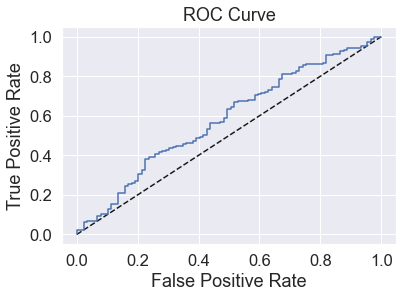

In [332]:
probs = quality_pred.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label=1)


# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### PRECISION RECALL CURVE

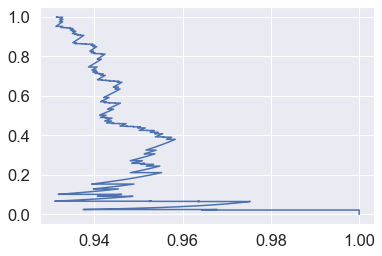

In [333]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)

plt.plot(precision, recall)
plt.show()

### C Hyperparameter Results 

In [334]:
C_values = [0.001,0.01,0.1,1,10,100, 1000]
accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values: 
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

,C Value,Accuracy Train,Accuracy Test
0,0.001,0.931691,0.931538
1,0.010,0.931691,0.931538
2,0.100,0.931691,0.931538
3,1.000,0.931691,0.931538
4,10.000,0.931691,0.931538
5,100.000,0.931691,0.931538
6,1000.000,0.931691,0.931538


## 6-3 Class Imbalance (클래스 분균형)

In [16]:
df_mean_imb = df_mean.copy() 

NameError: name 'df_mean' is not defined

In [17]:
df_mean_imb = df.copy()

In [18]:
bins = [0,4,10] 

labels = [0, 1] # 'low'=0, 'high'=1 
df_mean_imb['quality_range']= pd.cut(x=df_mean_imb['quality'], bins=bins, labels=labels) 

print(df_mean_imb[['quality_range','quality']].head(5)) 

df_mean_imb = df_mean_imb.drop('quality', axis=1) #

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


Low Quality  0   : %96.21
High Quality 1   : %3.79


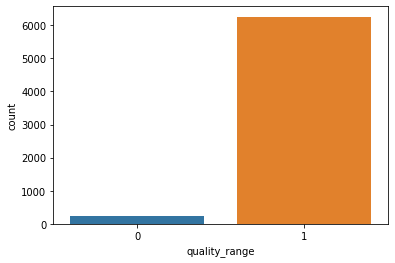

In [19]:
sns.countplot(df_mean_imb.quality_range)
 #'low'=0, 'high'=1
    
print("Low Quality  0   : %{:.2f}".format(sum(df_mean_imb.quality_range)/len(df_mean_imb.quality_range)*100))
print("High Quality 1   : %{:.2f}".format((len(df_mean_imb.quality_range)-sum(df_mean_imb.quality_range))/len(df_mean_imb.quality_range)*100))

In [22]:
df_mean_imb.to_csv('data/winequalityN_imblance.csv', index=False)

In [20]:
balance = (df_mean_imb.quality_range.value_counts()[1]/df_mean_imb.quality_range.shape[0])*100
print('Data Quality Percentage:\n', balance,'%')

Data Quality Percentage:
 3.7863629367400335 %


## 6-4. 오버샘플링 기법

In [339]:
pip install imblearn

In [340]:
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE 
smote = SMOTE() 

In [341]:
df_mean_imb.type = df_mean_imb.type.map({'white':0, 'red':1}) 

(6497, 12) (6497,)
(12502, 12) (12502,)


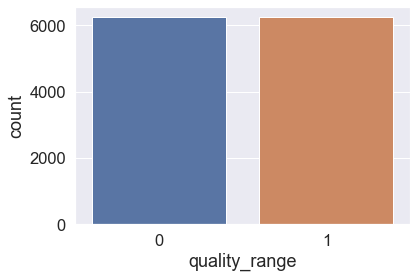

In [342]:
X =  df_mean_imb.drop(['quality_range'], axis=1) 
y =  df_mean_imb.quality_range 

X_sm, y_sm =smote.fit_resample(X, y) 

print(X.shape, y.shape) 
print(X_sm.shape, y_sm.shape) 
sns.countplot(y_sm) 

In [343]:
def create_model(X, y): 
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=40, stratify = y) 
    logreg_model = LogisticRegression() 
    logreg_model.fit(X_train, y_train) 

    pred_train = logreg_model.predict(X_train) 
    pred_test = logreg_model.predict(X_test) 
    confusion_matrix_train = confusion_matrix(y_train, pred_train) 
    confusion_matrix_test = confusion_matrix(y_test, pred_test) 
    print("Accuracy of Test Model : ",  logreg_model.score(X_test, y_test)) 
    print("Train Data Set") 
    print(classification_report(y_train,pred_train) ) 
    print("Test Data Set ") 
    print(classification_report(y_test,pred_test) ) 
    return  None 

In [344]:
create_model(X_sm,y_sm) 
warnings.filterwarnings('ignore')

Accuracy of Test Model :  0.7540983606557377
Train Data Set
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      5000
           1       0.74      0.78      0.76      5001

    accuracy                           0.75     10001
   macro avg       0.75      0.75      0.75     10001
weighted avg       0.75      0.75      0.75     10001

Test Data Set 
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1251
           1       0.74      0.77      0.76      1250

    accuracy                           0.75      2501
   macro avg       0.75      0.75      0.75      2501
weighted avg       0.75      0.75      0.75      2501



## Cross Validation: 2 Bins Model

In [345]:
df_bins.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,0,7.0,0.27,0.36,17.2,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [346]:
X = df_bins.drop(['quality_range'], axis=1)
y = df_bins.quality_range
y = np.array(y)

In [347]:
plt.style.use('fivethirtyeight')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print("Number of Rows in    Training dataset :  {} ".format(len(X_train)))
print("Number of Targets in Training dataset :  {} ".format(len(y_train)))
print("Number of Rows in    Test dataset :  {} ".format(len(X_test)))
print("Number of Targets in Test dataset :  {} ".format(len(y_test)))

Number of Rows in    Training dataset :  4547 
Number of Targets in Training dataset :  4547 
Number of Rows in    Test dataset :  1950 
Number of Targets in Test dataset :  1950 


(0.0, 1000.0)

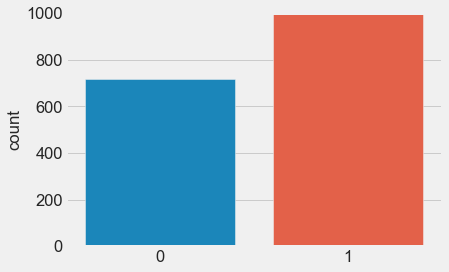

In [348]:
sns.countplot(y_test)
plt.ylim((0,1000))

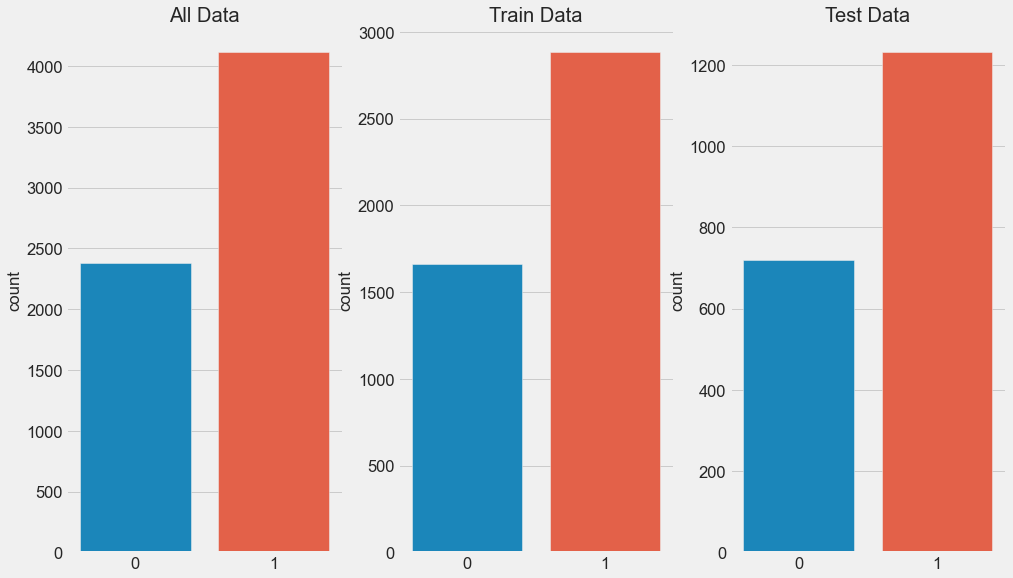

In [349]:
plt.figure(figsize=(15,9))
y_list = [y, y_train, y_test]
titles = ['All Data','Train Data', 'Test Data']

for i in range(1,4):
    plt.subplot(1,3,i)
    sns.countplot(y_list[i-1])
    plt.title(titles[i-1])
    


In [350]:
print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))

Tüm veri kümesi '0' yüzdesi : %37 
Test verisi '0' yüzdesi     : %37 
Eğitim verisi '0' yüzdesi   : %37 


In [352]:
LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
tahmin_eğitim = model.predict(X_train)
tahmin_test = model.predict(X_test)
model.score(X_test, y_test)

0.7415384615384616

##  K-Fold Cross Validation

In [353]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=40) 

In [354]:
X.loc[[3,5]] 


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [355]:
parcalar = kf.split(X)
for num, (train_index, test_index) in enumerate(parcalar): 
    print("{}.Training Set Size : {}".format(num+1,len(train_index)))  
    print("{}.Test Set Size     : {}".format(num+1,len(test_index))) 
    print('-'*26)

1.Training Set Size : 5197
1.Test Set Size     : 1300
--------------------------
2.Training Set Size : 5197
2.Test Set Size     : 1300
--------------------------
3.Training Set Size : 5198
3.Test Set Size     : 1299
--------------------------
4.Training Set Size : 5198
4.Test Set Size     : 1299
--------------------------
5.Training Set Size : 5198
5.Test Set Size     : 1299
--------------------------


In [356]:
from sklearn.metrics import mean_squared_error 

model2 = LogisticRegression()
pieces = kf.split(X)
accuracy_list = []

for i, (egitim_indeks, test_indeks) in enumerate(pieces):
    
    X_train, y_train = X.loc[train_index], y[train_index]
    X_test, y_test = X.loc[test_indeks], y[test_indeks]
    
    model2.fit(X_train, y_train)
    tahmin = model2.predict(X_test)
    accuracy_value = model2.score(X_test, y_test)  
    
    accuracy_list.append(accuracy_value)
    
    print("{}.Accuracy Value of Pieces: {:.3f}".format(i+1, accuracy_value))
    print("-"*30)

1.Accuracy Value of Pieces: 0.718
------------------------------
2.Accuracy Value of Pieces: 0.733
------------------------------
3.Accuracy Value of Pieces: 0.743
------------------------------
4.Accuracy Value of Pieces: 0.728
------------------------------
5.Accuracy Value of Pieces: 0.705
------------------------------


In [357]:
print("Avarage Accuracy Value : {:.2f}".format(np.mean(accuracy_list)))

Avarage Accuracy Value : 0.73


##  Cross Validation Score & Cross Validate

In [358]:
from sklearn.model_selection import cross_validate, cross_val_score

In [359]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores           : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.64769231 0.70461538 0.70923077 0.70615385 0.73384615 0.73692308
 0.73538462 0.82896764 0.63636364 0.76887519]
--------------------------------------------------
Train Scores           : 
[0.75200958 0.74277407 0.73148623 0.74482641 0.73901146 0.73627501
 0.73730118 0.72913817 0.74162107 0.73119015]


In [360]:
print('Mean of Test Set  : ', cv['test_score'].mean())
print('Mean of Train Set : ', cv['train_score'].mean())

Mean of Test Set  :  0.7208052625340761
Mean of Train Set :  0.7385633324887224


In [361]:
cv = cross_validate(estimator=lrm, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'r2', 'precision']
                    )

In [362]:
print('Test Set Accuracy   Mean      : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Set R Square   Mean      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Set Precision  Mean      : {:.2f}'.format(cv['test_precision'].mean()))
print('Train Set Accuracy  Mean      : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Train Set R Square  Mean      : {:.2f}'.format(cv['train_r2'].mean()))
print('Train Set Precision Mean      : {:.2f}'.format(cv['train_precision'].mean()))

Test Set Accuracy   Mean      : 0.72
Test Set R Square   Mean      : -0.20
Test Set Precision  Mean      : 0.76
Train Set Accuracy  Mean      : 0.74
Train Set R Square  Mean      : -0.13
Train Set Precision Mean      : 0.77


In [363]:
cv = cross_val_score(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10                    
                    )
print('Model Scores           : ', cv, sep = '\n')

Model Scores           : 
[0.64769231 0.70461538 0.70923077 0.70615385 0.73384615 0.73692308
 0.73538462 0.82896764 0.63636364 0.76887519]


cross_val_score and cross_validate functions used only test set. In order to have model predictions we can also check cross_val_predict  function.

In [364]:
from sklearn.model_selection import cross_val_predict 

In [365]:
y_pred = cross_val_predict(estimator=lrm, X=X, y=y, cv=10)
print(y_pred[0:10])

[1 0 1 1 1 1 0 1 0 1]


## 7. Hyperparameter Tuning

In [366]:
logreg = LogisticRegression()
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### GridSearchCV

In [367]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [368]:
parameters

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'penalty': ['l1', 'l2']}

In [369]:
from sklearn.model_selection import GridSearchCV


grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parameters,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [370]:
print("The Best Parametre : ", grid_cv.best_params_)
print("The Best Score     : ", grid_cv.best_score_)

The Best Parametre :  {'C': 100, 'penalty': 'l2'}
The Best Score     :  0.7278866895816047


In [371]:
results = grid_cv.cv_results_
df = pd.DataFrame(results)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000651,0.000083,0.000000,0.000000,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.023906,0.002251,0.001443,0.000131,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.636923,0.635385,0.643077,0.635385,0.635385,0.633846,0.633846,0.631741,0.633282,0.6302,0.634907,0.003295,10
2,0.000539,0.000033,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,0.036146,0.004389,0.001415,0.000084,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.646154,0.644615,0.663077,0.650769,0.652308,0.626154,0.638462,0.617874,0.633282,0.6302,0.640289,0.012974,9
4,0.000608,0.000144,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [372]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
15,l2,100,0.727887
17,l2,1000,0.725266
13,l2,10,0.721883
11,l2,1,0.720805
19,l2,10000,0.719262
9,l2,0.1,0.710034
7,l2,0.01,0.682476
5,l2,0.001,0.665071
3,l2,0.0001,0.640289
1,l2,1e-05,0.634907


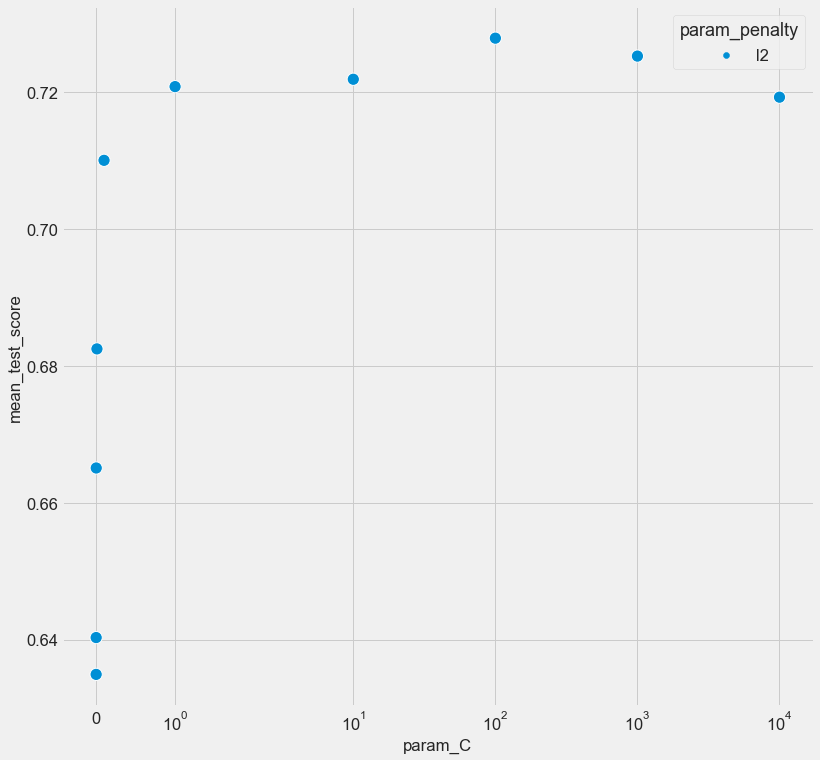

In [373]:
#The most successful 10 parametres on a chart.
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,12))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=150)

plt.xscale('symlog')
#plt.ylim((0.9,1))
plt.show()

### RandomizedSearchCV

In [375]:
parametres = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [376]:
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametres,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [377]:
print("The Best Parametres        : ", rs_cv.best_params_)
print("All Precisions Values      : ", rs_cv.cv_results_['mean_test_score'])
print("The Best Precision Value   : ", rs_cv.best_score_)

The Best Parametres        :  {'penalty': 'l2', 'C': 1000}
All Precisions Values      :  [0.64235071 0.6859778  0.76367682 0.76438192        nan 0.76586883
        nan        nan        nan        nan]
The Best Precision Value   :  0.7658688269839234


In [378]:
results_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(results_rs)

In [379]:
results_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
5,l2,1000,0.765869
3,l2,1,0.764382
2,l2,10,0.763677
1,l2,0.001,0.685978
0,l2,0.0001,0.642351
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,1e-05,NaN


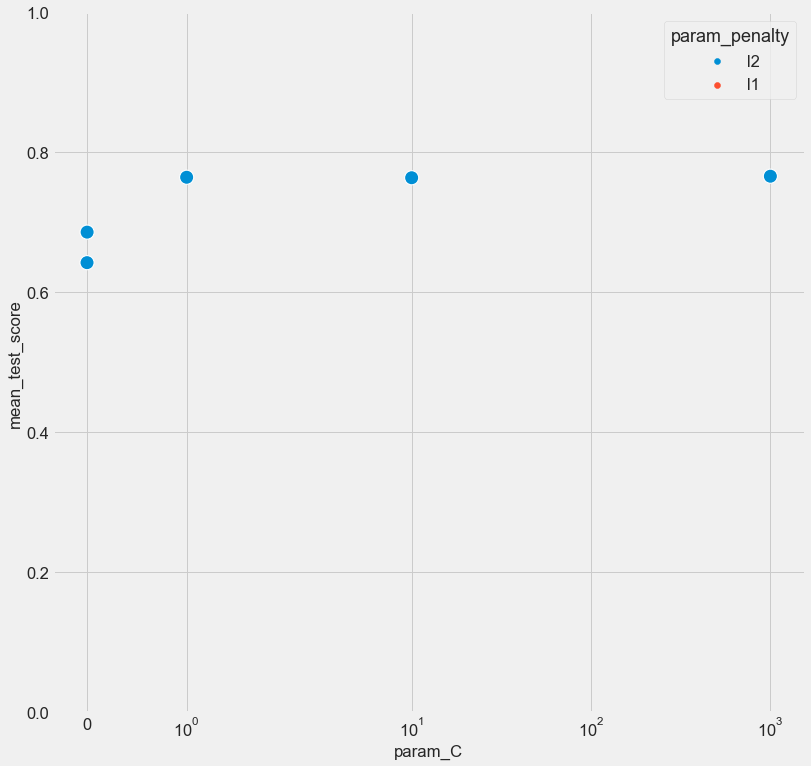

In [380]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,12))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.0,1))
plt.show()
